/home/zhongwei/.local/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/zhongwei/.local/lib/python3.7/site-packages/torchvision/image.so: undefined symbol: _ZNK3c1010TensorImpl36is_contiguous_nondefault_policy_implENS_12MemoryFormatE
  warn(f"Failed to load image Python extension: {e}")


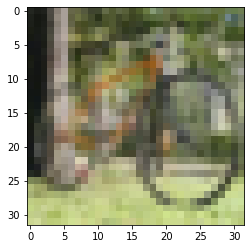

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import torchvision.transforms as transforms
from torch.utils.data import ConcatDataset, DataLoader, Subset, Dataset
import os
fname = "./0_0.png"
img = Image.open(fname)
plt.imshow(img)
plt.show()

In [12]:
class ImageDataset(Dataset):
    def __init__(self, path, tfm, files = None):
        super(ImageDataset).__init__()
        self.path = path
        self.files = sorted([os.path.join(path,x) for x in os.listdir(path) if x.endswith(".png")])
        if files != None:
            self.files = files
        self.transform = tfm

    def __len__(self):
        return len(self.files)
  
    def __getitem__(self,idx):
        fname = self.files[idx] 
        im = Image.open(fname)
        # 32x32
        im = self.transform(im)
        # im = self.data[idx]
        try:
            label = int(fname.split("/")[-1].split("_")[0])
            # print(label)
        except:
            label = -1 # test has no label
            # print(" test has no label")
        return im,label

In [13]:
from torchvision.transforms import ToPILImage
to_pil = ToPILImage()

def showBatchImage(loader, batch_idx, batch_size):
    fig = plt.figure(figsize=(10, 10))
    # figsize 不是 image dimension
    
    for i, batch in enumerate(loader):
        imgs, labels = batch
        if i == batch_idx:
            print("Label:",labels)
            print(labels.shape)
            ## Try transform for all imgs in batch
            for j in range(batch_size):
                img = imgs[j]
                img = to_pil(img)
                fig.add_subplot(1, batch_size, j+1)
                plt.imshow(img)
                plt.imshow(img)

            plt.show()
            break

Label: tensor([ 9, 19,  8, 37])
torch.Size([4])


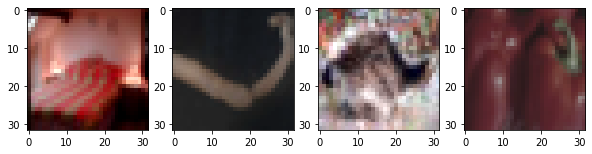

Label: tensor([13, 42, 28, 24])
torch.Size([4])


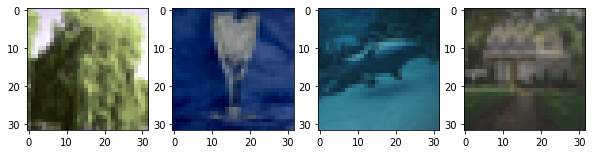

Label: tensor([ 5, 32,  8,  4])
torch.Size([4])


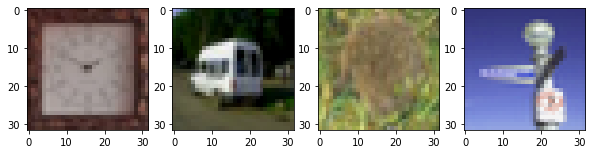

Label: tensor([38, 18, 15,  0])
torch.Size([4])


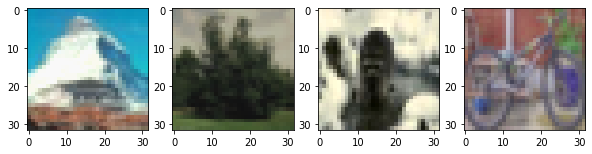

Label: tensor([41, 13, 33, 31])
torch.Size([4])


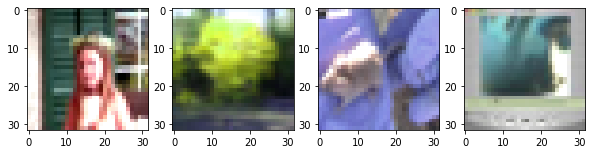

Label: tensor([17, 25, 41,  7])
torch.Size([4])


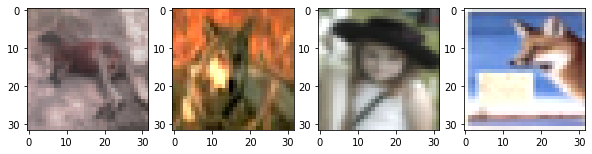

Label: tensor([23, 40, 12, 23])
torch.Size([4])


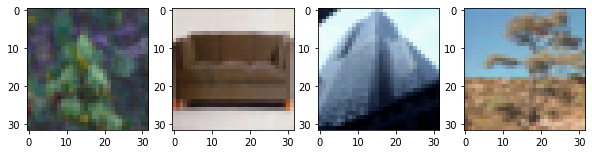

Label: tensor([10, 13,  5, 34])
torch.Size([4])


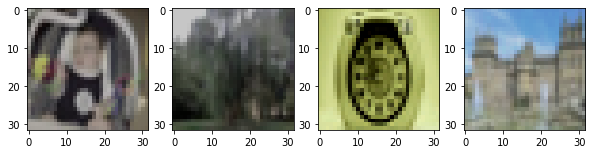

Label: tensor([46, 33,  4, 42])
torch.Size([4])


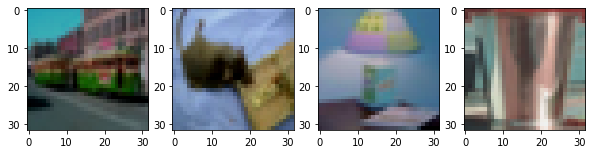

Label: tensor([47, 37, 33, 29])
torch.Size([4])


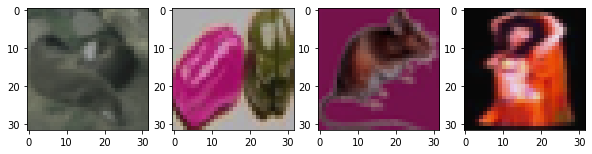

Label: tensor([16, 14,  5,  1])
torch.Size([4])


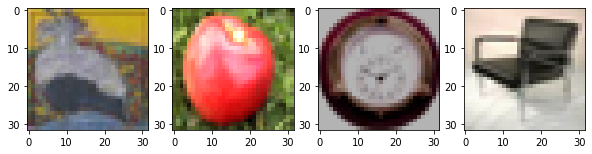

Label: tensor([46, 28, 13, 29])
torch.Size([4])


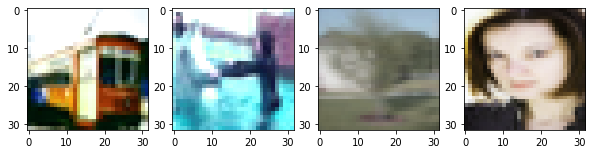

Label: tensor([ 6,  1, 39, 36])
torch.Size([4])


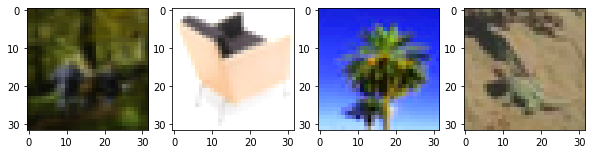

Label: tensor([18, 49,  7, 13])
torch.Size([4])


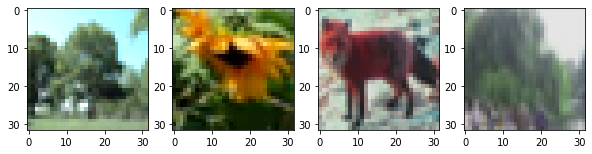

Label: tensor([45, 42, 30,  7])
torch.Size([4])


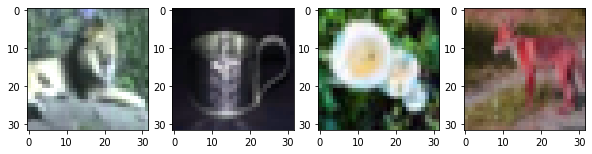

Label: tensor([38, 32,  2, 21])
torch.Size([4])


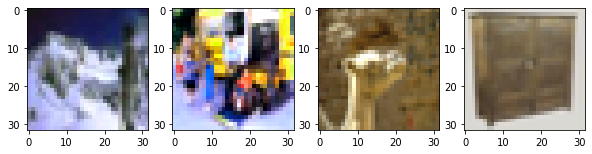

Label: tensor([36, 23, 27, 40])
torch.Size([4])


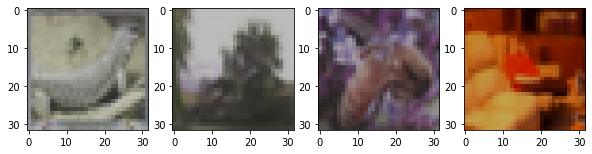

Label: tensor([39, 14, 29, 31])
torch.Size([4])


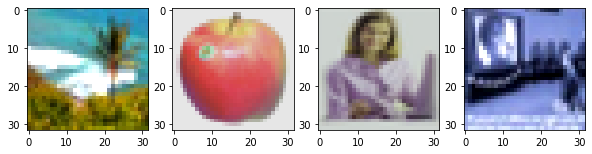

Label: tensor([38, 27, 16, 29])
torch.Size([4])


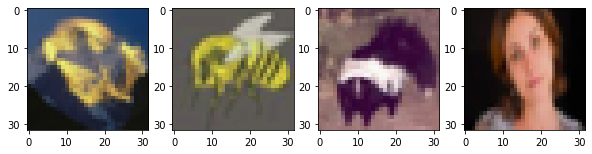

Label: tensor([40, 42, 27, 49])
torch.Size([4])


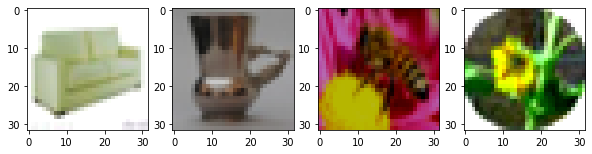

Label: tensor([45, 45, 25, 35])
torch.Size([4])


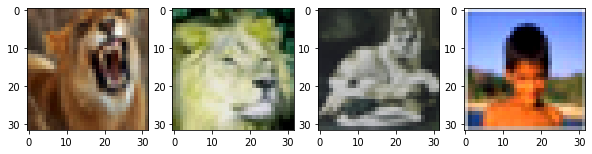

Label: tensor([34, 18, 36, 30])
torch.Size([4])


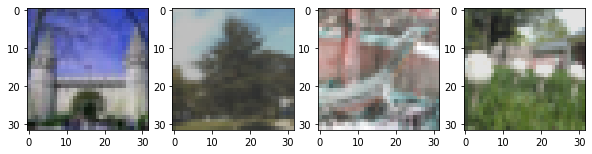

Label: tensor([31,  5, 35,  1])
torch.Size([4])


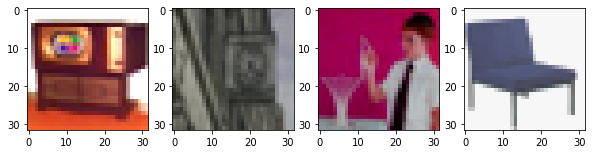

Label: tensor([12, 32, 48, 36])
torch.Size([4])


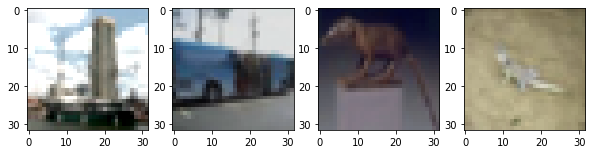

Label: tensor([37,  2, 40, 44])
torch.Size([4])


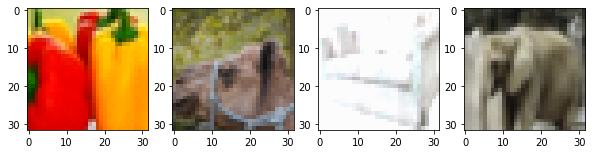

Label: tensor([35, 30, 47,  9])
torch.Size([4])


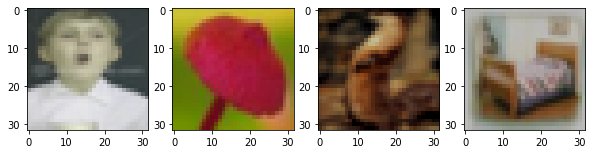

Label: tensor([47, 21,  7, 30])
torch.Size([4])


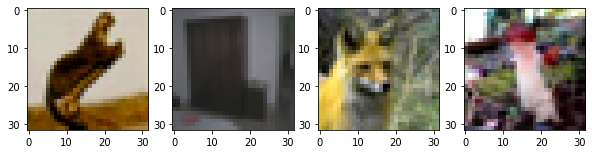

Label: tensor([44, 19, 30, 20])
torch.Size([4])


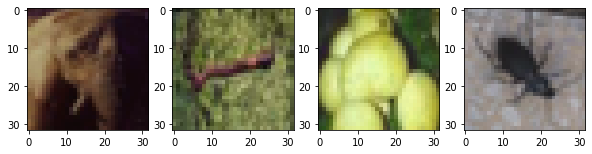

Label: tensor([49,  7, 29, 18])
torch.Size([4])


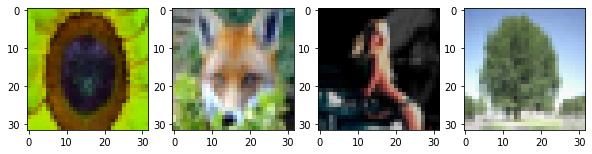

Label: tensor([ 8, 13,  9, 48])
torch.Size([4])


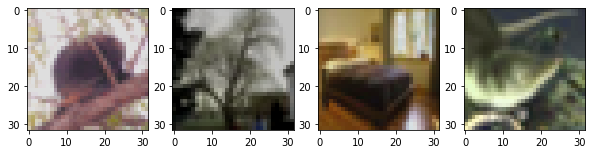

Label: tensor([18, 38, 21, 17])
torch.Size([4])


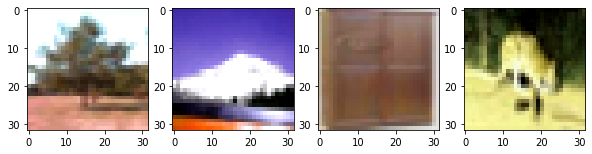

Label: tensor([44, 49,  1,  0])
torch.Size([4])


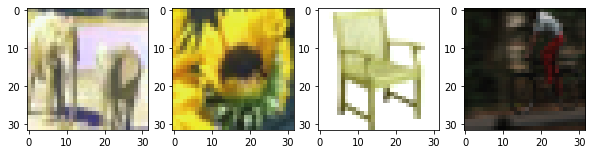

Label: tensor([13, 47, 48, 25])
torch.Size([4])


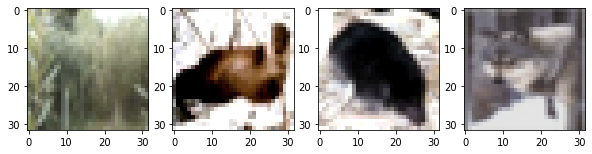

Label: tensor([34, 28, 29, 17])
torch.Size([4])


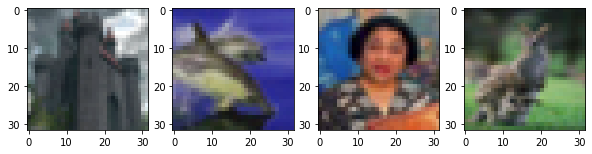

Label: tensor([24, 24, 14, 15])
torch.Size([4])


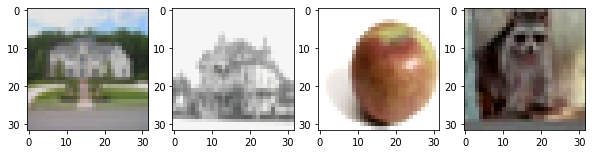

Label: tensor([41, 10, 39, 47])
torch.Size([4])


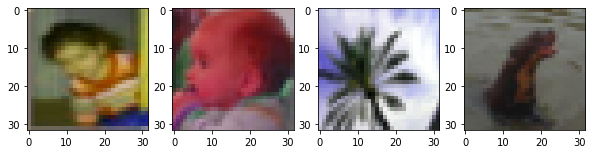

Label: tensor([ 7, 40, 31, 18])
torch.Size([4])


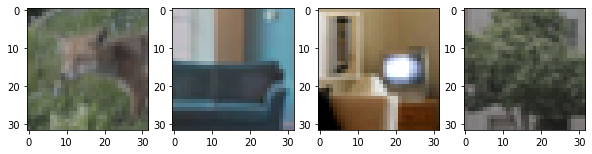

Label: tensor([ 3, 38, 32, 25])
torch.Size([4])


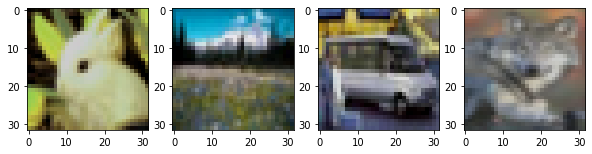

Label: tensor([ 1, 16,  8, 36])
torch.Size([4])


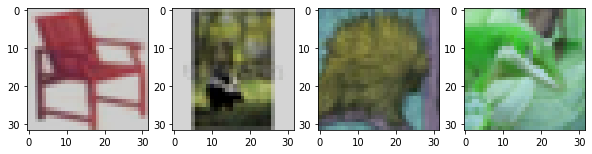

Label: tensor([44, 24, 22, 12])
torch.Size([4])


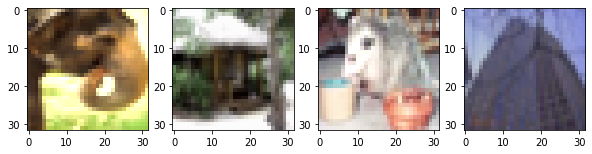

Label: tensor([48, 47, 39, 32])
torch.Size([4])


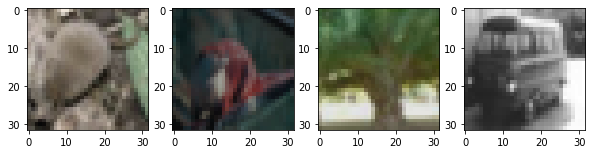

Label: tensor([41, 21, 44,  3])
torch.Size([4])


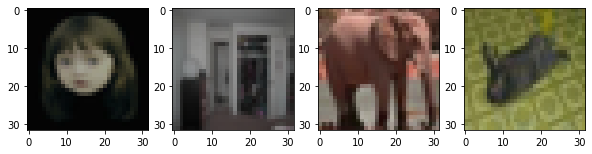

Label: tensor([14, 34, 38,  6])
torch.Size([4])


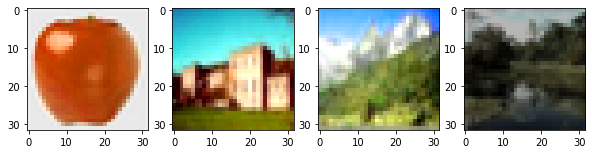

Label: tensor([20, 40, 14, 29])
torch.Size([4])


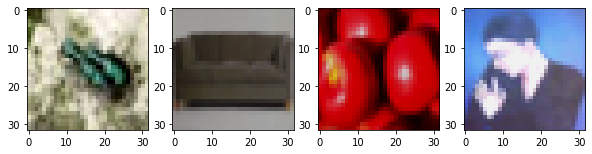

Label: tensor([37, 25, 19,  5])
torch.Size([4])


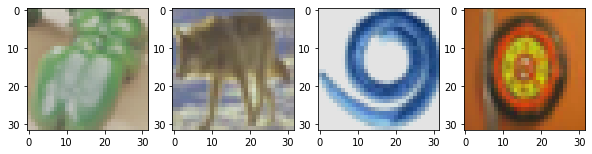

Label: tensor([11, 20, 24, 49])
torch.Size([4])


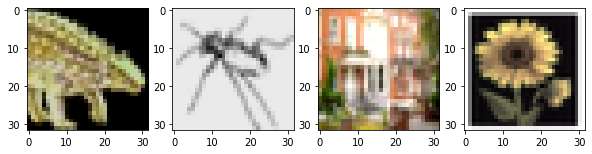

Label: tensor([44, 28, 23, 41])
torch.Size([4])


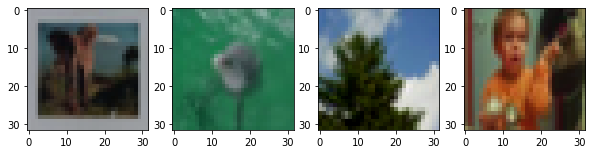

Label: tensor([37,  3, 46,  6])
torch.Size([4])


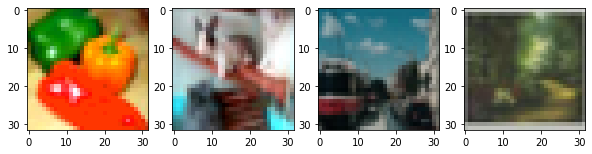

Label: tensor([45,  2,  9, 35])
torch.Size([4])


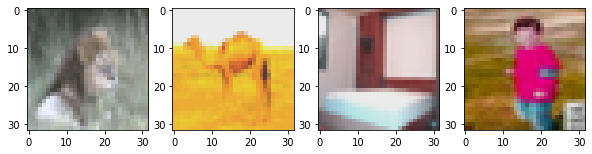

Label: tensor([ 6, 33, 26, 22])
torch.Size([4])


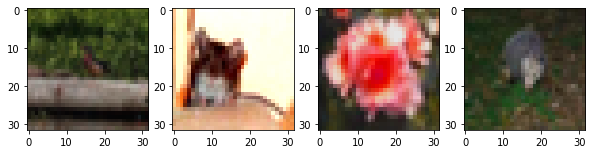

In [17]:
src_path = "./hw1_data/hw1_data/p1_data/train_50"
train_tfm = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.5, hue=0.1),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
])

dataset = ImageDataset(src_path, tfm=train_tfm)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

for idx in range(50):
        showBatchImage(dataloader, batch_idx=idx, batch_size=4)